Завдання

В якості домашнього завдання вам пропонується створити рекурентну нейронну мережу за допомогою механізмів Keras, яка буде класифікувати рецензії із датасету imdb.

На відміну від прикладу в модулі 9 ми використаємо рекурентну нейронну мережу. Поекспериментуйте з будовою мережі -

***RNN, LSTM, двостороння та глибока***.

Порівняйте результати та зробіть висновки.



https://developer.imdb.com/?ref_=header

https://uk.wikipedia.org/wiki/Internet_Movie_Database

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Bidirectional, Embedding, GRU, Dense, LSTM, SimpleRNN

from sklearn.metrics import classification_report, confusion_matrix

Встановлення гіперпараметрів

In [2]:
max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 40

Завантаження тренувальних та тестових даних зі вказанням обмеження на кількість слів

In [3]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

Застосування заздалегідь обраної максимальної довжини до послідовних даних тренувального та тестового наборів

In [4]:
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

# ***Побудова простої моделі RNN:***


In [5]:
model = Sequential()
model.add(Embedding(max_features, 40))
model.add(SimpleRNN(40))
model.add(Dense(1, activation='sigmoid'))

Компіляція моделі:



In [6]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

Навчання моделі:



In [7]:
history = model.fit(input_train, y_train, epochs=5, batch_size=40, validation_split=0.3)

Epoch 1/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 43s 89ms/step - acc: 0.5920 - loss: 0.6506 - val_acc: 0.8140 - val_loss: 0.4219
Epoch 2/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 70s 67ms/step - acc: 0.8308 - loss: 0.3891 - val_acc: 0.8344 - val_loss: 0.3804
Epoch 3/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 40s 63ms/step - acc: 0.8735 - loss: 0.2995 - val_acc: 0.8587 - val_loss: 0.3771
Epoch 4/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 38s 58ms/step - acc: 0.9045 - loss: 0.2459 - val_acc: 0.8445 - val_loss: 0.4040
Epoch 5/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 25s 57ms/step - acc: 0.9268 - loss: 0.1913 - val_acc: 0.7979 - val_loss: 0.5018


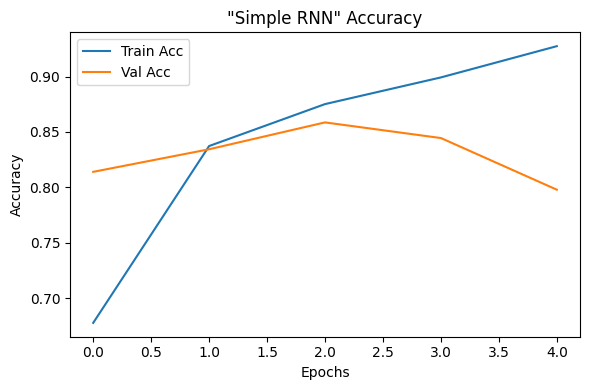

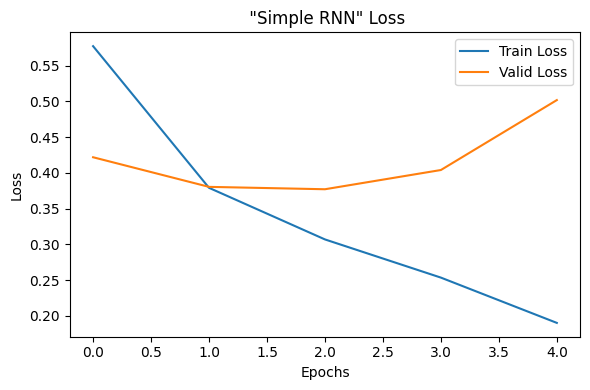

In [8]:
# Accuracy plot
plt.figure(figsize=(6, 4))
plt.plot(history.history['acc'], label='Train Acc')
plt.plot(history.history['val_acc'], label='Val Acc')
plt.title(f'"Simple RNN" Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# Loss plot
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Valid Loss')
plt.title(f' "Simple RNN" Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

Прогнозування з використанням навченої моделі:

In [9]:
predictions = model.predict(input_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss Simple RNN Model: {}'.format(test_loss))
print('Test Accuracy Simple RNN Model: {}'.format(test_acc))


782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - acc: 0.7973 - loss: 0.4990
Test Loss Simple RNN Model: 0.4987016022205353
Test Accuracy Simple RNN Model: 0.7972400188446045


In [10]:
print('Test Loss Simple RNN Model: {}'.format(test_loss))
print('Test Accuracy Simple RNN Model: {}'.format(test_acc))

Test Loss Simple RNN Model: 0.4987016022205353
Test Accuracy Simple RNN Model: 0.7972400188446045


# ***Побудова моделі LSTM:***

In [11]:
model = Sequential()
model.add(Embedding(max_features, 40))
model.add(LSTM(40))
model.add(Dense(1, activation='sigmoid'))

In [12]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [13]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(input_train, y_train, epochs=5, batch_size=40, validation_split=0.3)

Epoch 1/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - acc: 0.6478 - loss: 0.5992 - val_acc: 0.7284 - val_loss: 0.5963
Epoch 2/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - acc: 0.8628 - loss: 0.3382 - val_acc: 0.8783 - val_loss: 0.2994
Epoch 3/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - acc: 0.8825 - loss: 0.2895 - val_acc: 0.8343 - val_loss: 0.3717
Epoch 4/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - acc: 0.9067 - loss: 0.2373 - val_acc: 0.8692 - val_loss: 0.3147
Epoch 5/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - acc: 0.9255 - loss: 0.2041 - val_acc: 0.8759 - val_loss: 0.3357


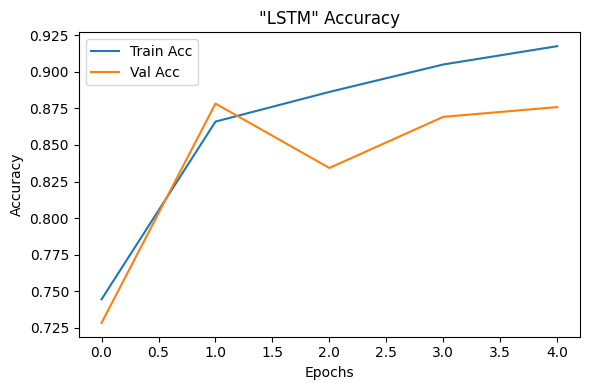

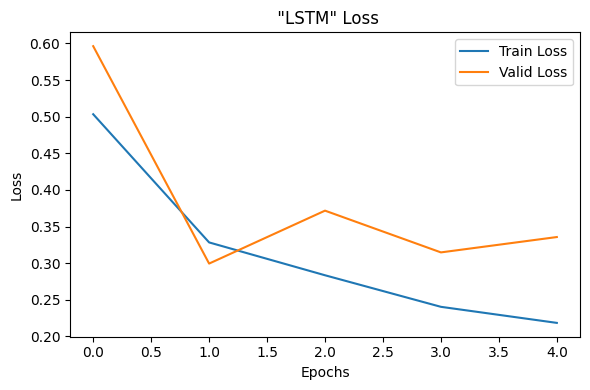

In [15]:
# Accuracy plot
plt.figure(figsize=(6, 4))
plt.plot(history.history['acc'], label='Train Acc')
plt.plot(history.history['val_acc'], label='Val Acc')
plt.title(f'"LSTM" Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# Loss plot
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Valid Loss')
plt.title(f' "LSTM" Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [16]:
predictions = model.predict(input_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss LSTM Model: {}'.format(test_loss))
print('Test Accuracy LSTM Model: {}'.format(test_acc))

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - acc: 0.8682 - loss: 0.3535
Test Loss LSTM Model: 0.353091299533844
Test Accuracy LSTM Model: 0.8695600032806396


In [17]:
print('Test Loss LSTM Model: {}'.format(test_loss))
print('Test Accuracy LSTM Model: {}'.format(test_acc))

Test Loss LSTM Model: 0.353091299533844
Test Accuracy LSTM Model: 0.8695600032806396


# Побудова моделі ***Bidirectional RNN*** :

In [18]:
model = Sequential()
model.add(Embedding(max_features, 40))
model.add(Bidirectional(LSTM(40)))
model.add(Dense(1, activation='sigmoid'))

In [19]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [20]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
history = model.fit(input_train, y_train, epochs=5, batch_size=40, validation_split=0.3)

Epoch 1/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - acc: 0.6248 - loss: 0.6170 - val_acc: 0.8373 - val_loss: 0.3773
Epoch 2/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - acc: 0.8595 - loss: 0.3486 - val_acc: 0.8640 - val_loss: 0.3286
Epoch 3/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 21s 39ms/step - acc: 0.8970 - loss: 0.2663 - val_acc: 0.8537 - val_loss: 0.3596
Epoch 4/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - acc: 0.9051 - loss: 0.2477 - val_acc: 0.8835 - val_loss: 0.2861
Epoch 5/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - acc: 0.9215 - loss: 0.2116 - val_acc: 0.8779 - val_loss: 0.2973


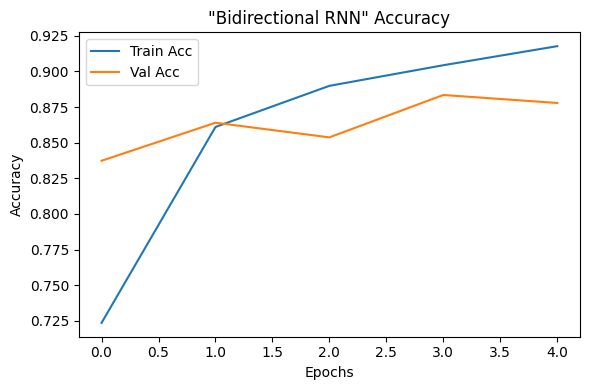

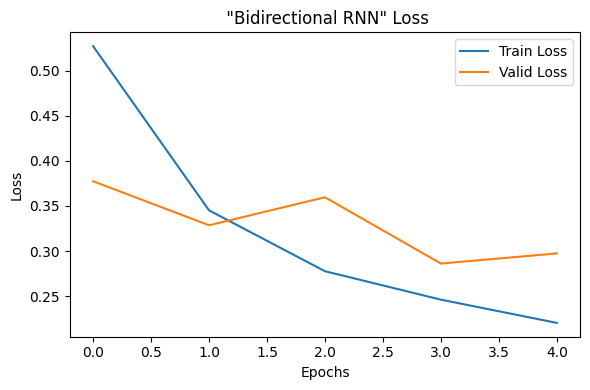

In [22]:
# Accuracy plot
plt.figure(figsize=(6, 4))
plt.plot(history.history['acc'], label='Train Acc')
plt.plot(history.history['val_acc'], label='Val Acc')
plt.title(f'"Bidirectional RNN" Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# Loss plot
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Valid Loss')
plt.title(f' "Bidirectional RNN" Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [23]:
predictions = model.predict(input_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss Bidirectional RNN: {}'.format(test_loss))
print('Test Accuracy Bidirectional RNN: {}'.format(test_acc))

782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - acc: 0.8698 - loss: 0.3244
Test Loss Bidirectional RNN: 0.3213803470134735
Test Accuracy Bidirectional RNN: 0.8699600100517273


In [24]:
print('Test Loss Bidirectional RNN: {}'.format(test_loss))
print('Test Accuracy Bidirectional RNN: {}'.format(test_acc))

Test Loss Bidirectional RNN: 0.3213803470134735
Test Accuracy Bidirectional RNN: 0.8699600100517273


# ***Побудова моделі DRNN:***

In [25]:
model = Sequential()
model.add(Embedding(max_features, 40))
model.add(LSTM(40, return_sequences=True))
model.add(LSTM(40))
model.add(Dense(1, activation='sigmoid'))

In [26]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [27]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
history = model.fit(input_train, y_train, epochs=5, batch_size=40, validation_split=0.3)

Epoch 1/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - acc: 0.6269 - loss: 0.6115 - val_acc: 0.7560 - val_loss: 0.5223
Epoch 2/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - acc: 0.8580 - loss: 0.3479 - val_acc: 0.8669 - val_loss: 0.3243
Epoch 3/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - acc: 0.8965 - loss: 0.2714 - val_acc: 0.8520 - val_loss: 0.3463
Epoch 4/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - acc: 0.9216 - loss: 0.2157 - val_acc: 0.8853 - val_loss: 0.2953
Epoch 5/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - acc: 0.9265 - loss: 0.2004 - val_acc: 0.8843 - val_loss: 0.2974


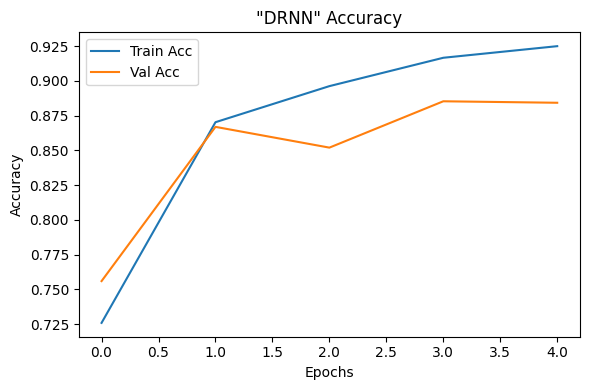

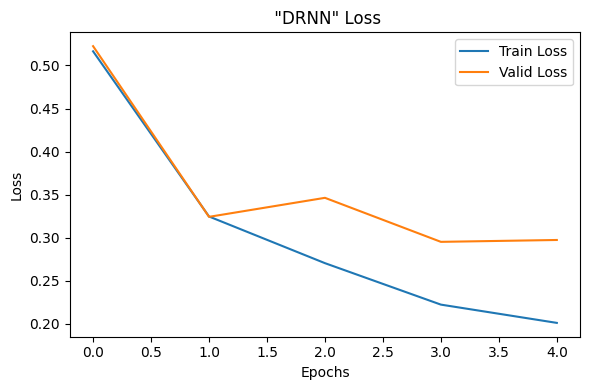

In [29]:
# Accuracy plot
plt.figure(figsize=(6, 4))
plt.plot(history.history['acc'], label='Train Acc')
plt.plot(history.history['val_acc'], label='Val Acc')
plt.title(f'"DRNN" Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# Loss plot
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Valid Loss')
plt.title(f' "DRNN" Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [30]:
predictions = model.predict(input_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss DRNN Model: {}'.format(test_loss))
print('Test Accuracy DRNN Model: {}'.format(test_acc))

782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - acc: 0.8799 - loss: 0.3132
Test Loss DRNN Model: 0.30992913246154785
Test Accuracy DRNN Model: 0.880840003490448


In [31]:
print('Test Loss DRNN Model: {}'.format(test_loss))
print('Test Accuracy DRNN Model: {}'.format(test_acc))

Test Loss DRNN Model: 0.30992913246154785
Test Accuracy DRNN Model: 0.880840003490448


# **Висновки**
В ході даного Домашнього завдання, потрібно було проаналізуати датасет бінарної класифікації (1 - позитивні, 0 - негативні) з рецензіями на фільми/серіали.

Internet Movie Database (IMDb) — найбільша база даних та вебсайт про кінематограф.

Вирішення завдання здійснювалось за допомогою рекурентної нейронної мережі та використовувала такі моделі: звичайну Simple RNN, LSTM,  BRNN та  DRNN нейромережі.

***Отже,***

1. У всіх моделях можна спостерігати **високу точність на Навчальних даних**.
Моделі гарно навчаютьс ята адаптуються до начальних даних.

2. На тестових даних модель **Bidirectional RNN** показує найвищу точність та найменьшу помилку порівняно з іншими варіантами моделей. Це означає, що вона краще узагальнює знання на основі нових даних.

3. Змінивши параметри, модель **DRNN**, показала кращу точність та низьку помилку на тестових даних